In [100]:
from numpy import random
from random import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
np.random.seed(666)
from random import sample 
from deap import tools

In [143]:
class GA():
    def __init__(self,k=2,pop_size=100, ind_size=8, n_iterations = 50, mutation_prob = 0.1):
        self.k = k
        self.pop_size = pop_size
        self.ind_size = ind_size
        self.hist = []
        self.data = np.loadtxt('file-tsp.txt')
        self.n_iterations = n_iterations
        self.mutation_prob = mutation_prob
        
        self.generate_pop()
    
    def generate_pop(self):
        self.pop =  np.array([random.permutation([i for i in range(0,self.ind_size)]) for x in range(self.pop_size) ])
        
    def tournament(self):
        new_pop = []
        for i in range(self.pop_size):
            
            indices = random.choice(len(self.pop), 2, replace=True)
            candidates = self.pop[indices]
            
            fittest =  candidates[0] if self.evaluate(candidates[0]) < self.evaluate(candidates[1]) else candidates[1]
            new_pop.append(fittest)
        return new_pop
    
    def evaluate(self,ind):
        l = []
        for i in range(self.ind_size-1):

            dist = np.linalg.norm(self.data[ind[i]]-self.data[ind[i+1]])    
            l.append(dist)
        return l, sum(l)
    
    def avg_pop(self):
        return np.average([self.evaluate(x)[1] for x in self.pop])
    
    def get_best_sol(self):
        best_index = 0
        best_fitness = self.evaluate(self.pop[0])[1]
        for i in range(1, len(self.pop)):
            current = self.evaluate(self.pop[0])[1]
            if (current > best_fitness):
                best_index = i
                best_fitness = current
        return (best_index, best_fitness)
    
    
    def order_crossover(self,p1, p2):
        
        size = self.ind_size
        p1, p2 = list(p1), list(p2)
        #(1) CHOOSE 2 CUT POINTS
        start, end = np.sort(random.choice(range(1,size - 1), 2, replace = False))
        c1 = [-1] * size
        c2 = [-1] * size
        
        # (2) COPY BETWEEEN CUT POINTS TO OFFSPRINGS
        c1[start:end] = p1[start:end]
        c2[start:end] = p2[start:end]
        
        
        p1_order = p1[end:] + p1[:end]
        p2_order = p2[end:] + p2[:end]

        missing_indices = np.append(range(end,size),range(0,start))

        # (3) STARTING FROM 2ND CUT POINT IN ONE PARENT, FILL MISSING CITIES IN ORDER THEY APPEAR IN OTHER PARENT
        p1_pos, p2_pos = 0, 0
        for index in missing_indices:
            #child 1
            while True:
                if(p2_order[p2_pos] not in c1):
                    c1[index] = p2_order[p2_pos]
                    p2_pos += 1
                    break
                p2_pos += 1
            #child 2
            while True:
                if(p1_order[p1_pos] not in c2):
                    c2[index] = p1_order[p1_pos]
                    p1_pos += 1
                    break
                p1_pos += 1   
             
        return c1, c2
    
    def reverse_sequence_mutation(self, parent, p):
        if not (rand() < p):
            return parent
        size = self.ind_size
        i1, i2 = np.sort(random.choice(range(0,size ), 2, replace = False))
        old_parent = parent.copy()
        parent[i1] = old_parent[i2]
        parent[i2] = old_parent[i1]
        
        return parent
    def plot_hist(self):
        return self.hist
        
    def run(self):   
        for i in range(self.n_iterations):
            print(f'ik ben bij iteratie {i+1}')
            new_pop = []
            self.tournament()
            
            for j in range(0, len(self.pop), 2):
                p1 = self.pop[j]
                p2 = self.pop[j+1]
                
                c1, c2 = self.order_crossover(p1,p2)
                c1 = self.reverse_sequence_mutation(c1, self.mutation_prob)
                c2 = self.reverse_sequence_mutation(c2, self.mutation_prob)
                
                new_pop.extend((c1,c2)) 
            best_index, best_fitness = self.get_best_sol()
            self.hist.append((best_fitness, self.pop[best_index]))
            self.pop = np.array(new_pop)
                

In [144]:
g = GA(ind_size=50, n_iterations = 400, mutation_prob=0.8)

In [145]:
g.run()

ik ben bij iteratie 0
ik ben bij iteratie 1
ik ben bij iteratie 2
ik ben bij iteratie 3
ik ben bij iteratie 4
ik ben bij iteratie 5
ik ben bij iteratie 6
ik ben bij iteratie 7
ik ben bij iteratie 8
ik ben bij iteratie 9
ik ben bij iteratie 10
ik ben bij iteratie 11
ik ben bij iteratie 12
ik ben bij iteratie 13
ik ben bij iteratie 14
ik ben bij iteratie 15
ik ben bij iteratie 16
ik ben bij iteratie 17
ik ben bij iteratie 18
ik ben bij iteratie 19
ik ben bij iteratie 20
ik ben bij iteratie 21
ik ben bij iteratie 22
ik ben bij iteratie 23
ik ben bij iteratie 24
ik ben bij iteratie 25
ik ben bij iteratie 26
ik ben bij iteratie 27
ik ben bij iteratie 28
ik ben bij iteratie 29
ik ben bij iteratie 30
ik ben bij iteratie 31
ik ben bij iteratie 32
ik ben bij iteratie 33
ik ben bij iteratie 34
ik ben bij iteratie 35
ik ben bij iteratie 36
ik ben bij iteratie 37
ik ben bij iteratie 38
ik ben bij iteratie 39
ik ben bij iteratie 40
ik ben bij iteratie 41
ik ben bij iteratie 42
ik ben bij iteratie 4

ik ben bij iteratie 347
ik ben bij iteratie 348
ik ben bij iteratie 349
ik ben bij iteratie 350
ik ben bij iteratie 351
ik ben bij iteratie 352
ik ben bij iteratie 353
ik ben bij iteratie 354
ik ben bij iteratie 355
ik ben bij iteratie 356
ik ben bij iteratie 357
ik ben bij iteratie 358
ik ben bij iteratie 359
ik ben bij iteratie 360
ik ben bij iteratie 361
ik ben bij iteratie 362
ik ben bij iteratie 363
ik ben bij iteratie 364
ik ben bij iteratie 365
ik ben bij iteratie 366
ik ben bij iteratie 367
ik ben bij iteratie 368
ik ben bij iteratie 369
ik ben bij iteratie 370
ik ben bij iteratie 371
ik ben bij iteratie 372
ik ben bij iteratie 373
ik ben bij iteratie 374
ik ben bij iteratie 375
ik ben bij iteratie 376
ik ben bij iteratie 377
ik ben bij iteratie 378
ik ben bij iteratie 379
ik ben bij iteratie 380
ik ben bij iteratie 381
ik ben bij iteratie 382
ik ben bij iteratie 383
ik ben bij iteratie 384
ik ben bij iteratie 385
ik ben bij iteratie 386
ik ben bij iteratie 387
ik ben bij itera

In [146]:
best_fitness, best_solution = [x[0] for x in g.plot_hist()], [x[1] for x in g.plot_hist()]

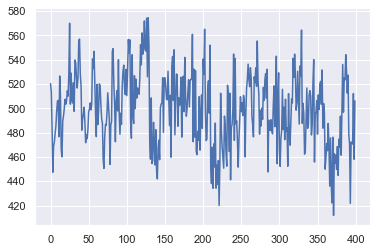

In [148]:
plt.plot(range(len(best_fitness)), [x for x in best_fitness])
plt.show()